In [12]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram

量子回路の準備

In [13]:
q = QuantumRegister(3, name="q")
crx = ClassicalRegister(1, name="crx")
crz = ClassicalRegister(1, name="crz")
cr_Bob = ClassicalRegister(1, name="cr_Bob")
qc = QuantumCircuit(q, crx, crz, cr_Bob)

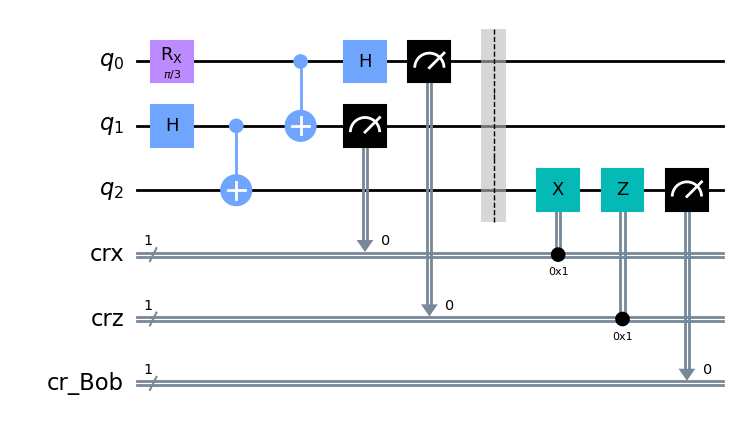

In [14]:
#Aliceが送りたい量子ビットの状態をq0に用意
qc.rx(pi/3, 0)

#AliceとBobが共有しているもつれ量子ビット対の準備
qc.h(1)
qc.cx(1,2)

#Aliceが送りたい量子ビットと自分のもつれ量子ビットを相互作用
qc.cx(0,1)
qc.h(0)

#Aliceの持つ量子ビットq0,q1を測定
qc.measure(0, crz)
qc.measure(1, crx)
qc.barrier()

#Aliceから送られた測定結果より、Bobの操作をきめる
def decode_Bob(qc):
    qc.x(2).c_if(crx, 1)
    qc.z(2).c_if(crz, 1)

decode_Bob(qc)
qc.measure(2, cr_Bob)

#量子回路を描画
qc.draw('mpl')

シミュレーターで実行

{'0 1 1': 180, '0 0 1': 196, '0 0 0': 193, '0 1 0': 215, '1 0 1': 66, '1 0 0': 57, '1 1 0': 63, '1 1 1': 54}


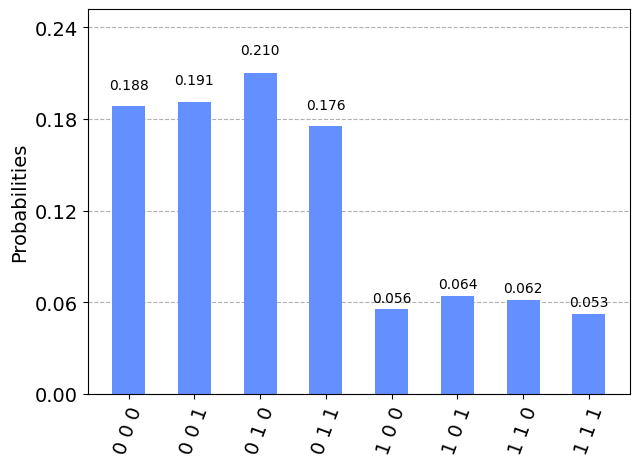

In [17]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

print(answer)
plot_histogram(answer)

q2の結果のみを集計する

In [19]:
count_zero = 0
count_one = 0
keys = list(answer.keys())
for key in keys:
    if key[0] == '0':
        count_zero += answer[key]
    else:
        count_one += answer[key]

print("probability of |0>:{:.3f}".format(count_zero / shots))
print("probability of |1>:{:.3f}".format(count_one / shots))

probability of |0>:0.766
probability of |1>:0.234


# この測定値は、元のqoの状態1/2(√3|0>+|1>)から得られる確率分布の従っている